In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.optim import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np

# GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 데이터셋 준비
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# DataLoader 설정
batch_size = 256

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# CIFAR10의 입력 shape 확인
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(f"Input shape: {images.shape}")

Using device: cuda


100%|██████████| 170498071/170498071 [00:13<00:00, 13059857.89it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Input shape: torch.Size([256, 3, 32, 32])


In [ ]:


# 정확도 측정 함수
def accuracy(model, dataloader):
    cnt = 0
    acc = 0
    model.eval()
    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            preds = model(inputs)
            preds = torch.argmax(preds, dim=-1)
            cnt += labels.shape[0]
            acc += (labels == preds).sum().item()
    return acc / cnt

# 학습 함수
def train_model(model, optimizer, n_epochs, trainloader, testloader=None):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    train_accs = []
    test_accs = []

    for epoch in range(n_epochs):
        model.train()
        total_loss = 0.
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_acc = accuracy(model, trainloader)
        train_accs.append(train_acc)

        if testloader:
            test_acc = accuracy(model, testloader)
            test_accs.append(test_acc)
            print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
        else:
            print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f}")

    return train_accs, test_accs

In [ ]:

# 모델 정의
dropOut = 0.1

class ModelLeakyReLU(nn.Module):
    def __init__(self, input_dim, n_dim, num_classes=10):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, num_classes)
        self.act = nn.LeakyReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)
        return x

class ModelSigmoid(nn.Module):
    def __init__(self, input_dim, n_dim, num_classes=10):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, num_classes)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)
        return x

class ModelLeakyReLUDropout(nn.Module):
    def __init__(self, input_dim, n_dim, num_classes=10):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, num_classes)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropOut)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(self.act(self.layer1(x)))
        x = self.dropout(self.act(self.layer2(x)))
        x = self.layer3(x)
        return x

Epoch   0 | Loss: 433.3098 | Train Acc: 0.2686
Epoch   1 | Loss: 399.8413 | Train Acc: 0.3163
Epoch   2 | Loss: 376.3764 | Train Acc: 0.3439
Epoch   3 | Loss: 360.5263 | Train Acc: 0.3699
Epoch   4 | Loss: 349.0364 | Train Acc: 0.3842
Epoch   5 | Loss: 340.1950 | Train Acc: 0.3979
Epoch   6 | Loss: 332.6738 | Train Acc: 0.4090
Epoch   7 | Loss: 326.3661 | Train Acc: 0.4217
Epoch   8 | Loss: 320.8906 | Train Acc: 0.4312
Epoch   9 | Loss: 316.0854 | Train Acc: 0.4405
Epoch  10 | Loss: 311.6202 | Train Acc: 0.4464
Epoch  11 | Loss: 307.4625 | Train Acc: 0.4521
Epoch  12 | Loss: 303.5596 | Train Acc: 0.4621
Epoch  13 | Loss: 299.9865 | Train Acc: 0.4696
Epoch  14 | Loss: 296.4710 | Train Acc: 0.4741
Epoch  15 | Loss: 293.1348 | Train Acc: 0.4803
Epoch  16 | Loss: 289.6778 | Train Acc: 0.4859
Epoch  17 | Loss: 286.5871 | Train Acc: 0.4934
Epoch  18 | Loss: 283.4495 | Train Acc: 0.4996
Epoch  19 | Loss: 280.2663 | Train Acc: 0.5050
Epoch  20 | Loss: 277.3056 | Train Acc: 0.5116
Epoch  21 | L

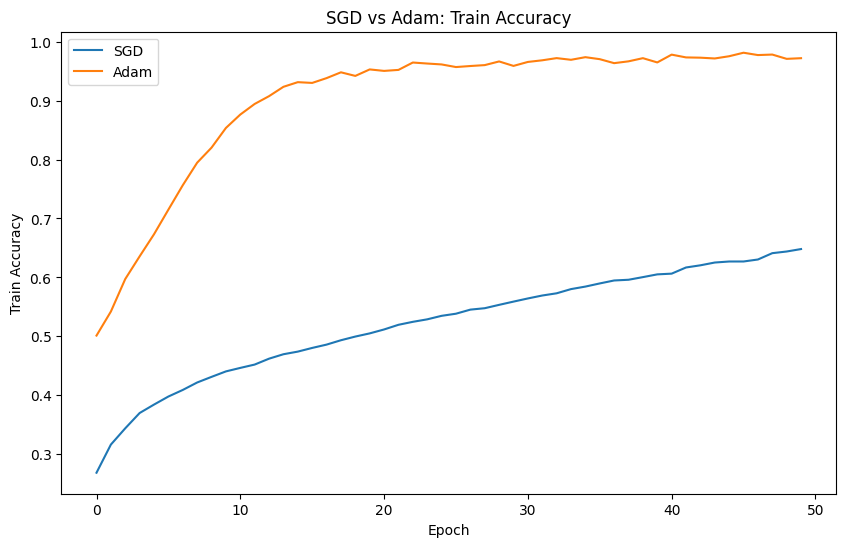

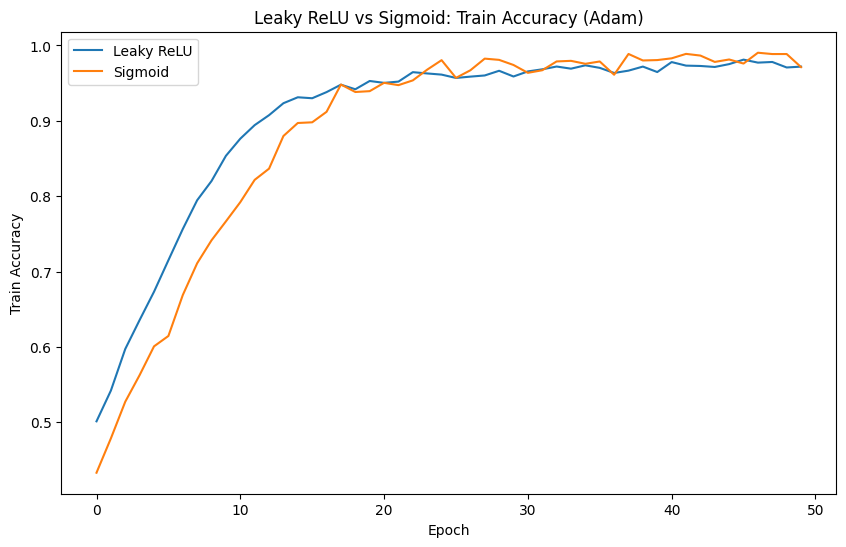

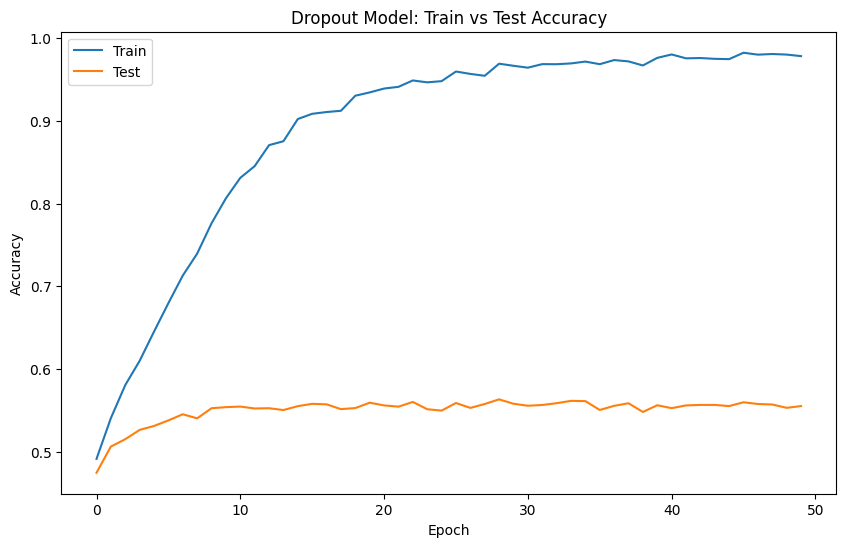

In [ ]:



# 모델 초기화
input_dim = 32 * 32 * 3  # CIFAR10 이미지 크기
n_dim = 1024
n_epochs = 50
dropout = 0.1

# 비교대상 SGD vs ADAM && Leaky ReLU와 Sigmoid
model_sgd = ModelLeakyReLU(input_dim, n_dim)
model_adam = ModelLeakyReLU(input_dim, n_dim)
model_sigmoid = ModelSigmoid(input_dim, n_dim)
model_dropout = ModelLeakyReLUDropout(input_dim, n_dim)

# 옵티마이저 설정
sgd_optimizer = SGD(model_sgd.parameters(), lr=0.01)
adam_optimizer = Adam(model_adam.parameters(), lr=0.001)

# 학습 및 결과 저장
sgd_train_accs, _ = train_model(model_sgd, sgd_optimizer, n_epochs, trainloader)
adam_train_accs, _ = train_model(model_adam, adam_optimizer, n_epochs, trainloader)
sigmoid_train_accs, _ = train_model(model_sigmoid, Adam(model_sigmoid.parameters(), lr=0.001), n_epochs, trainloader)
dropout_train_accs, dropout_test_accs = train_model(model_dropout, Adam(model_dropout.parameters(), lr=0.001), n_epochs, trainloader, testloader)

# Plot 1: SGD vs Adam
plt.figure(figsize=(10, 6))
plt.plot(sgd_train_accs, label='SGD')
plt.plot(adam_train_accs, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.title('SGD vs Adam: Train Accuracy')
plt.legend()
plt.show()

# Plot 2: Leaky ReLU vs Sigmoid
plt.figure(figsize=(10, 6))
plt.plot(adam_train_accs, label='Leaky ReLU')
plt.plot(sigmoid_train_accs, label='Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.title('Leaky ReLU vs Sigmoid: Train Accuracy (Adam)')
plt.legend()
plt.show()

# Plot 3: Dropout model - Train vs Test Accuracy
plt.figure(figsize=(10, 6))
plt.plot(dropout_train_accs, label='Train')
plt.plot(dropout_test_accs, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dropout Model: Train vs Test Accuracy')
plt.legend()
plt.show()